In [32]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
#Load the training set
df_train = pd.read_csv("AMZN_train.csv")

In [3]:
# (#rows, #columns)
df_train.shape
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4781 entries, 0 to 4780
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       4781 non-null   object 
 1   Open       4781 non-null   float64
 2   High       4781 non-null   float64
 3   Low        4781 non-null   float64
 4   Close      4781 non-null   float64
 5   Adj Close  4781 non-null   float64
 6   Volume     4781 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 261.6+ KB


In [4]:
df_train.describe()

,Open,High,Low,Close,Adj Close,Volume
count,4781.000000,4781.000000,4781.000000,4781.000000,4781.000000,4.781000e+03
mean,127.619845,129.480122,125.697925,127.662449,127.662449,8.225935e+06
std,145.693083,147.132537,144.053633,145.677581,145.677581,7.810188e+06
min,1.406250,1.447917,1.312500,1.395833,1.395833,4.872000e+05
25%,34.299999,34.849998,33.660000,34.310001,34.310001,4.200900e+06
50%,62.880001,64.750000,60.937500,62.750000,62.750000,6.200100e+06
75%,189.009995,191.600006,186.210007,189.029999,189.029999,9.239900e+06
max,717.380005,722.450012,711.510010,717.929993,717.929993,1.043292e+08


In [5]:
df_train["Date"].describe()

count           4781
unique          4781
top       1997-05-15
freq               1
Name: Date, dtype: object

In [6]:
df_train["Date"].min(), df_train["Date"].max()

('1997-05-15', '2016-05-13')

<Axes: xlabel='Date'>

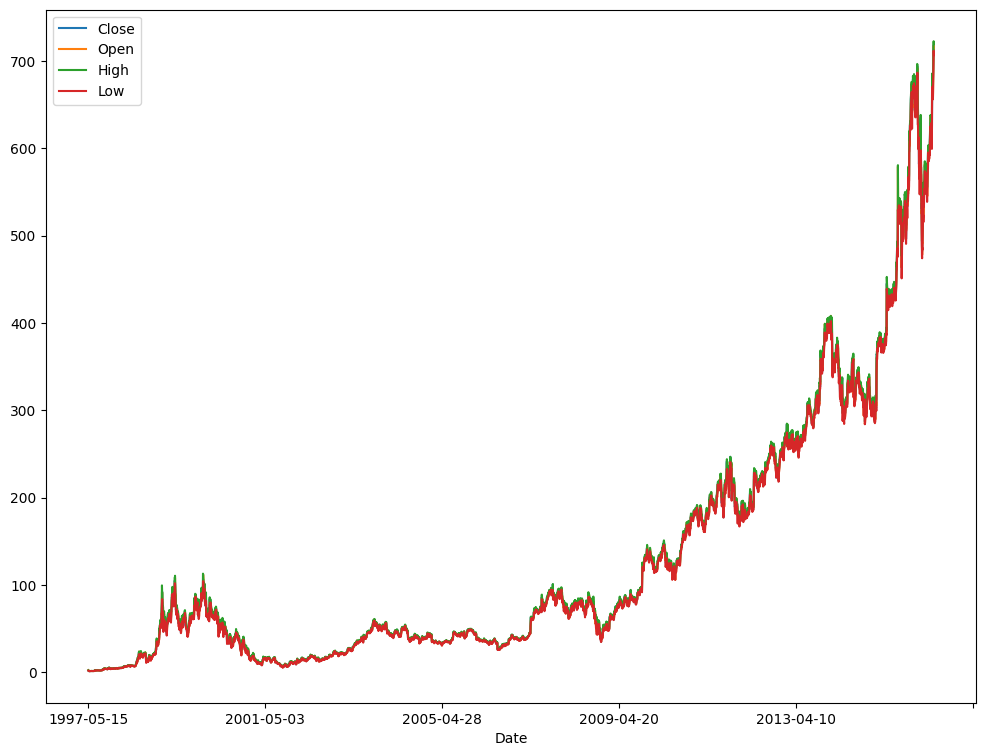

In [7]:
plt.rcParams["figure.figsize"] = (12, 9)
df_train.plot(x="Date", y=["Close", "Open", "High", "Low"])

In [8]:
def analysis(dataframe):
    print("Shape", dataframe.shape, "\n")
    print("Columns", dataframe.columns,"\n")
    print("Information", dataframe.info, "\n")
    print(dataframe.describe, "\n")
    print("The data date ranges from", dataframe["Date"].min() ,"to", dataframe["Date"].max())
    dataframe.plot(x="Date", y=["Close", "Open", "High", "Low"])

Shape (503, 7) 

Columns Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object') 

Information <bound method DataFrame.info of            Date         Open         High          Low        Close   
0    2016-05-16   710.130005   713.250000   700.280029   710.659973  \
1    2016-05-17   709.900024   714.469971   693.909973   695.270020   
2    2016-05-18   689.559998   702.539978   688.760010   697.450012   
3    2016-05-19   691.880005   699.400024   689.559998   698.520020   
4    2016-05-20   701.049988   707.239990   700.000000   702.799988   
..          ...          ...          ...          ...          ...   
498  2018-05-08  1595.000000  1596.880005  1582.510010  1592.390015   
499  2018-05-09  1600.000000  1608.000000  1592.000000  1608.000000   
500  2018-05-10  1608.479980  1615.599976  1603.439941  1609.079956   
501  2018-05-11  1610.989990  1611.099976  1597.890015  1602.910034   
502  2018-05-14  1604.000000  1611.180054  1600.050049  1601.

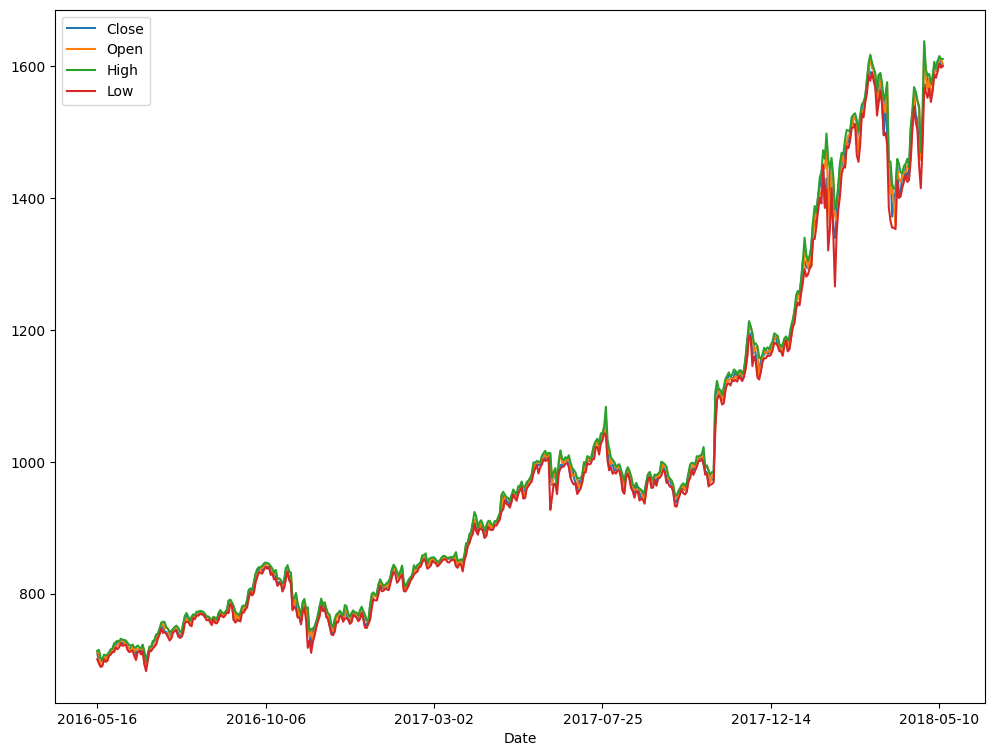

In [9]:
# read validation and test sets and then analyse them
df_val = pd.read_csv("AMZN_val.csv")
analysis(df_val)

Shape (504, 7) 

Columns Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object') 

Information <bound method DataFrame.info of            Date         Open         High          Low        Close   
0    2018-05-15  1587.800049  1587.800049  1565.219971  1576.119995  \
1    2018-05-16  1577.500000  1594.430054  1576.670044  1587.280029   
2    2018-05-17  1580.560059  1594.040039  1573.000000  1581.760010   
3    2018-05-18  1581.329956  1583.589966  1572.099976  1574.369995   
4    2018-05-21  1585.000000  1592.050049  1575.000000  1585.459961   
..          ...          ...          ...          ...          ...   
499  2020-05-08  2372.139893  2387.239990  2357.000000  2379.610107   
500  2020-05-11  2374.699951  2419.669922  2372.110107  2409.000000   
501  2020-05-12  2411.850098  2419.000000  2355.000000  2356.949951   
502  2020-05-13  2366.800049  2407.699951  2337.800049  2367.919922   
503  2020-05-14  2361.010010  2391.370117  2353.209961  2388.

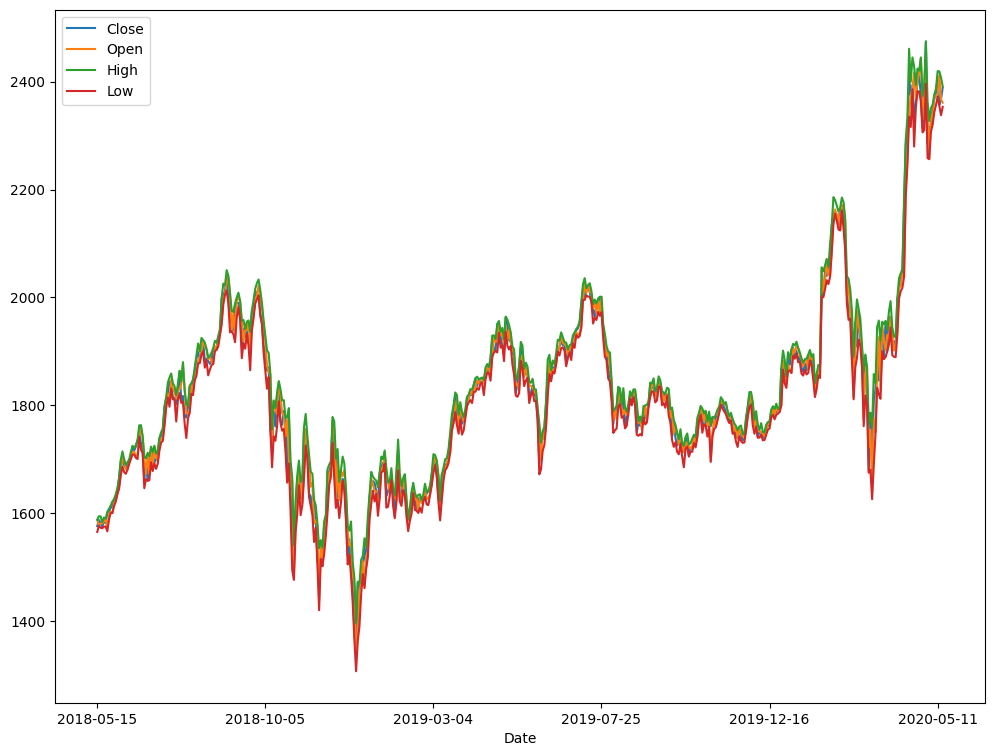

In [10]:
df_test = pd.read_csv("AMZN_test.csv")
analysis(df_test)

In [11]:
# Make sure that the data is sorted by date
df_train.sort_values(by="Date", inplace=True)
df_val.sort_values(by="Date", inplace=True)
df_test.sort_values(by="Date", inplace=True)

# notice that the data is shifted by a period of '-1', this takes the next day's price direction for the current day a positive period will take the days from the past
df_train["Target"] = (df_train["Close"] > df_train["Open"]).shift(periods=-1, fill_value=0).astype(int)

target_distribution = df_train["Target"].value_counts()

print("Target Distribution:")
print(target_distribution)
print("\nExplanation:")
print("1 indicates that the closing price is higher than the opening.")
print("0 indicates that the closing price is lower than the opening.")

df_train

Target Distribution:
Target
1    2392
0    2389
Name: count, dtype: int64

Explanation:
1 indicates that the closing price is higher than the opening.
0 indicates that the closing price is lower than the opening.


,Date,Open,High,Low,Close,Adj Close,Volume,Target
0,1997-05-15,2.437500,2.500000,1.927083,1.958333,1.958333,72156000,0
1,1997-05-16,1.968750,1.979167,1.708333,1.729167,1.729167,14700000,0
2,1997-05-19,1.760417,1.770833,1.625000,1.708333,1.708333,6106800,0
3,1997-05-20,1.729167,1.750000,1.635417,1.635417,1.635417,5467200,0
4,1997-05-21,1.635417,1.645833,1.375000,1.427083,1.427083,18853200,0
...,...,...,...,...,...,...,...,...
4776,2016-05-09,673.950012,686.979980,671.409973,679.750000,679.750000,3982200,1
4777,2016-05-10,694.000000,704.549988,693.500000,703.070007,703.070007,6105600,1
4778,2016-05-11,705.789978,719.000000,701.650024,713.229980,713.229980,7338200,1
4779,2016-05-12,717.380005,722.450012,711.510010,717.929993,717.929993,5048200,0


In [12]:
df_val["Target"] = (df_val["Close"] > df_val["Open"]).shift(periods=-1, fill_value=0).astype(int)
df_val["Target"].value_counts()

Target
0    255
1    248
Name: count, dtype: int64

In [13]:
df_test["Target"] = (df_test["Close"] > df_test["Open"]).shift(periods=-1, fill_value=0).astype(int)
df_test["Target"].value_counts()

Target
1    255
0    249
Name: count, dtype: int64

**Feature Engineering**

In [14]:
#Make 3-days moving average
df_train["Moving_Average_3"] = (df_train["Close"] - df_train["Open"]).rolling(window=3, min_periods=1).mean()
df_val["Moving_Average_3"] = (df_val["Close"] - df_val["Open"]).rolling(window=3, min_periods=1).mean()
df_test["Moving_Average_3"] = (df_test["Close"] - df_test["Open"]).rolling(window=3, min_periods=1).mean()

In [15]:
#Make 7-days moving average
df_train["Moving_Average_7"] = (df_train["Close"] - df_train["Open"]).rolling(window=7, min_periods=1).mean()
df_val["Moving_Average_7"] = (df_val["Close"] - df_val["Open"]).rolling(window=7, min_periods=1).mean()
df_test["Moving_Average_7"] = (df_test["Close"] - df_test["Open"]).rolling(window=7, min_periods=1).mean()

In [16]:
# Create Relative Strength Index (RSI) feature
def calculate_rsi(df, window=14):
    delta = df["Close"].diff()
    gain = delta.where(delta > 0, 0)
    loss = -delta.where(delta < 0, 0)
    
    avg_gain = gain.rolling(window=window, min_periods=1).mean()
    avg_loss = loss.rolling(window=window, min_periods=1).mean()
    
    rs = avg_gain / avg_loss
    rsi = 100 - (100 / (1 + rs))
    
    df["RSI"] = rsi
    return df

# Apply Relative Strength Index (RSI) calculation
df_train = calculate_rsi(df_train, window=14)
df_val = calculate_rsi(df_val, window=14)
df_test = calculate_rsi(df_test, window=14)

In [17]:
# Apply Relative Price Change calculation
df_train["Relative_Price_Change"] = ((df_train["Close"] - df_train["Open"]) / df_train["Open"]) * 100
df_val["Relative_Price_Change"] = ((df_val["Close"] - df_val["Open"]) / df_val["Open"]) * 100
df_test["Relative_Price_Change"] = ((df_test["Close"] - df_test["Open"]) / df_test["Open"]) * 100

In [18]:
# Apply Bollinger Bands calculation
rolling_mean = df_train["Close"].rolling(window=20).mean()
rolling_std = df_train["Close"].rolling(window=20).std()

df_train["Bollinger_Upper"] = rolling_mean + (rolling_std * 2)
df_train["Bollinger_Lower"] = rolling_mean - (rolling_std * 2)
df_val["Bollinger_Upper"] = rolling_mean + (rolling_std * 2)
df_val["Bollinger_Lower"] = rolling_mean - (rolling_std * 2)
df_test["Bollinger_Upper"] = rolling_mean + (rolling_std * 2)
df_test["Bollinger_Lower"] = rolling_mean - (rolling_std * 2)

**Machine Learning Algorithms**

In [19]:
# Target column that we aim to predict
y_col = "Target"
# Input features for the models
X_cols = [
    "Open",
    "Close",
    "High",
    "Low",
    "Volume",
    "Adj Close",
    "Moving_Average_3",
    "Moving_Average_7",
    "Bollinger_Upper",
    "Bollinger_Lower",
    "RSI" 
]


X_train = df_train[X_cols]
y_train = df_train[y_col]

X_val = df_val[X_cols]
y_val = df_val[y_col]

X_test = df_val[X_cols]
y_test = df_val[y_col]

X_train = X_train.fillna(X_train.mean())
y_train = y_train.fillna(y_train.mean())
X_val = X_val.fillna(X_val.mean())
y_val = y_val.fillna(y_val.mean())
X_test = X_test.fillna(X_test.mean())
y_test = y_test.fillna(y_test.mean())

**Decision Tree**

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


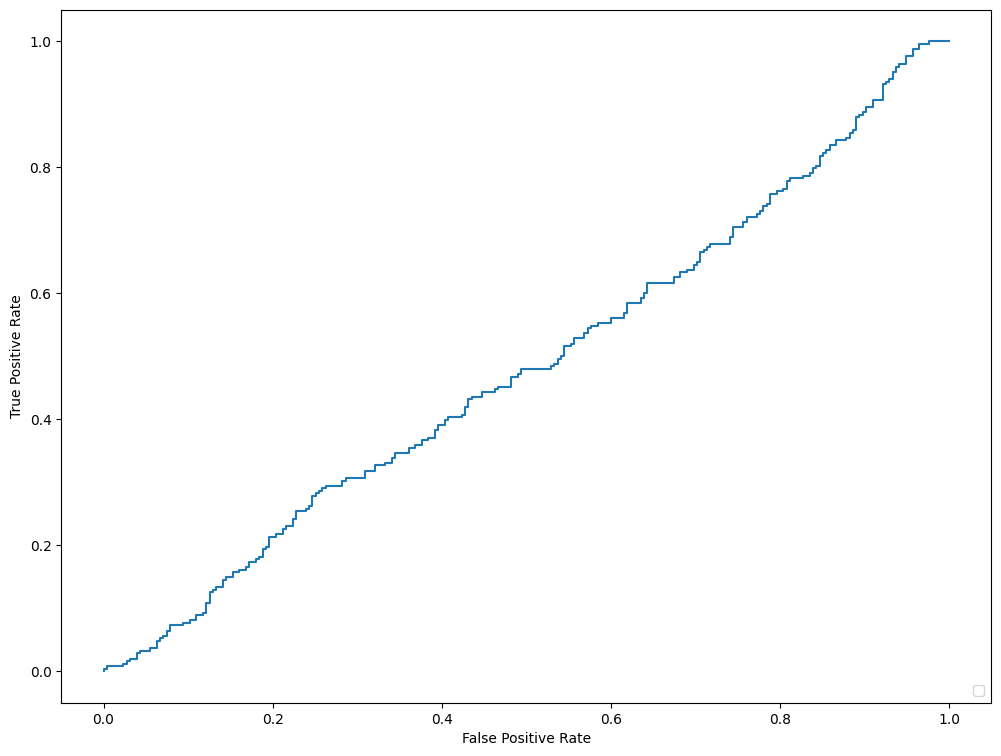

In [35]:
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_curve, RocCurveDisplay

# use default parameters
mod = make_pipeline(StandardScaler(), LogisticRegression(random_state=42))
mod.fit(X_train, y_train)

y_score = mod.decision_function(X_test)
fpr, tpr, _ = roc_curve(y_test, y_score, pos_label=mod.classes_[1])
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()
